In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [3]:
leanleft_posture_data = list(Path("posture_data").glob("data_leanleft*.json"))
leanleft_posture_data

leanright_posture_data = list(Path("posture_data").glob("data_leanright*.json"))
leanright_posture_data

[WindowsPath('posture_data/data_leanright_1641506323.json'),
 WindowsPath('posture_data/data_leanright_1641508630.json'),
 WindowsPath('posture_data/data_leanright_1641509472.json'),
 WindowsPath('posture_data/data_leanright_1641512030.json'),
 WindowsPath('posture_data/data_leanright_1641512849.json'),
 WindowsPath('posture_data/data_leanright_1641513688.json'),
 WindowsPath('posture_data/data_leanright_1641514525.json'),
 WindowsPath('posture_data/data_leanright_1641528242.json'),
 WindowsPath('posture_data/data_leanright_1641529043.json'),
 WindowsPath('posture_data/data_leanright_1641572947.json'),
 WindowsPath('posture_data/data_leanright_1641575960.json'),
 WindowsPath('posture_data/data_leanright_1641578014.json'),
 WindowsPath('posture_data/data_leanright_1641578818.json'),
 WindowsPath('posture_data/data_leanright_1641580372.json'),
 WindowsPath('posture_data/data_leanright_1641581177.json'),
 WindowsPath('posture_data/data_leanright_1641581981.json'),
 WindowsPath('posture_da

In [4]:
leanleft_posture_dict = dict()
leanright_posture_dict = dict()

In [5]:
for file in leanleft_posture_data:
    with open(file) as infile:
        json_data = json.load(infile)
        leanleft_posture_dict.update(json_data)
        
for file in leanright_posture_data:
    with open(file) as infile:
        json_data = json.load(infile)
        leanright_posture_dict.update(json_data)

In [6]:
leanleft_data = []
for ts, scores in leanleft_posture_dict.items():
    leanleft_data.append((ts, np.mean(scores)))
    
leanright_data = []
for ts, scores in leanright_posture_dict.items():
    leanright_data.append((ts, np.mean(scores)))

In [7]:
leanleft_data_df = pd.DataFrame(leanleft_data)
leanleft_data_df.columns = ['ts', 'score']

leanright_data_df = pd.DataFrame(leanright_data)
leanright_data_df.columns = ['ts', 'score']

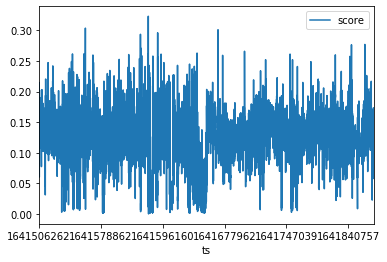

In [8]:
leanleft_data_df.plot(x='ts', y='score')

In [9]:
leanleft_data_df['score'].describe()

count    54118.000000
mean         0.125306
std          0.033030
min          0.000042
25%          0.114972
50%          0.129322
75%          0.143431
max          0.323263
Name: score, dtype: float64

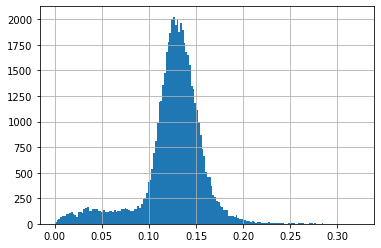

In [10]:
leanleft_data_df['score'].hist(bins=170)

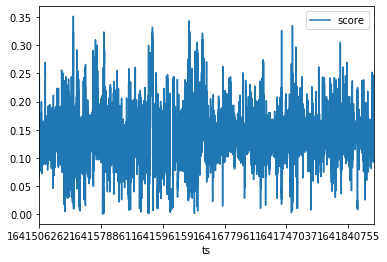

In [11]:
leanright_data_df.plot(x='ts', y='score')

In [12]:
leanright_data_df['score'].describe()

count    54121.000000
mean         0.141550
std          0.036040
min          0.000721
25%          0.124948
50%          0.140462
75%          0.156802
max          0.351369
Name: score, dtype: float64

#### normal posture

In [13]:
headdown_posture_data = list(Path("posture_data").glob("data_leanleft*.json"))
headdown_posture_data

[WindowsPath('posture_data/data_leanleft_1641506323.json'),
 WindowsPath('posture_data/data_leanleft_1641508630.json'),
 WindowsPath('posture_data/data_leanleft_1641509472.json'),
 WindowsPath('posture_data/data_leanleft_1641512030.json'),
 WindowsPath('posture_data/data_leanleft_1641512849.json'),
 WindowsPath('posture_data/data_leanleft_1641513688.json'),
 WindowsPath('posture_data/data_leanleft_1641514524.json'),
 WindowsPath('posture_data/data_leanleft_1641528242.json'),
 WindowsPath('posture_data/data_leanleft_1641529043.json'),
 WindowsPath('posture_data/data_leanleft_1641572947.json'),
 WindowsPath('posture_data/data_leanleft_1641575960.json'),
 WindowsPath('posture_data/data_leanleft_1641578014.json'),
 WindowsPath('posture_data/data_leanleft_1641578818.json'),
 WindowsPath('posture_data/data_leanleft_1641580372.json'),
 WindowsPath('posture_data/data_leanleft_1641581177.json'),
 WindowsPath('posture_data/data_leanleft_1641581981.json'),
 WindowsPath('posture_data/data_leanleft

In [14]:
def get_posture_data(posture: str) -> pd.DataFrame:
    posture_data_files = list(Path("posture_data").glob(f"data_{posture}*.json"))
    posture_data_dict = dict()
    for file in posture_data_files:
        with open(file) as infile:
            json_data = json.load(infile)
            posture_data_dict.update(json_data)
    posture_data_lst = []
    for ts, scores in posture_data_dict.items():
        posture_data_lst.append((ts, np.mean(scores)))
    posture_data_df = pd.DataFrame(posture_data_lst)
    posture_data_df.columns = ['ts', 'metric']
    return posture_data_df

In [15]:
headdown_posture_data_df = get_posture_data("headdown")
headdown_posture_data_df  = headdown_posture_data_df.sort_values('ts')

In [16]:
headdown_posture_data_df['metric']

0        0.156353
1        0.140815
2        0.134910
3        0.141308
4        0.145075
           ...   
54219    0.328275
54220    0.326320
54221    0.329119
54222    0.330361
54223    0.338143
Name: metric, Length: 54224, dtype: float64

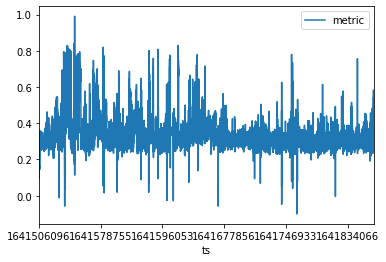

In [17]:
headdown_posture_data_df.plot(x='ts', y='metric')

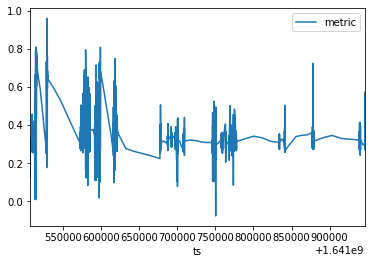

In [18]:
headdown_posture_data_df_ma = \
    headdown_posture_data_df.rolling(5).mean()

headdown_posture_data_df_ma.plot(x='ts', y='metric')

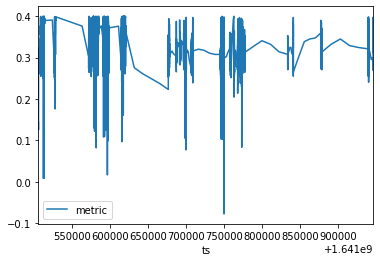

In [19]:
headdown_posture_data_df_ma.query("metric < 0.4").plot(x='ts', y='metric')

In [20]:
22 3 4 5 6

SyntaxError: invalid syntax (<ipython-input-20-7b5753563d7a>, line 1)